In [6]:
#Importing required libraries

import mne
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Reading the EEG data from the file and storing it in a NumPy array

with open("eeg-data.txt", "r") as f:
    eeg_data = np.array([float(line.strip()) for line in f])
eeg_data = eeg_data.reshape(1,-1)         #converting EEG data array to 2-D array

In [16]:
#Setting sampling frequency and frequency bands

#channels = ["F3"]
sfreq = 100
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30)}

Effective window size : 10.240 (s)


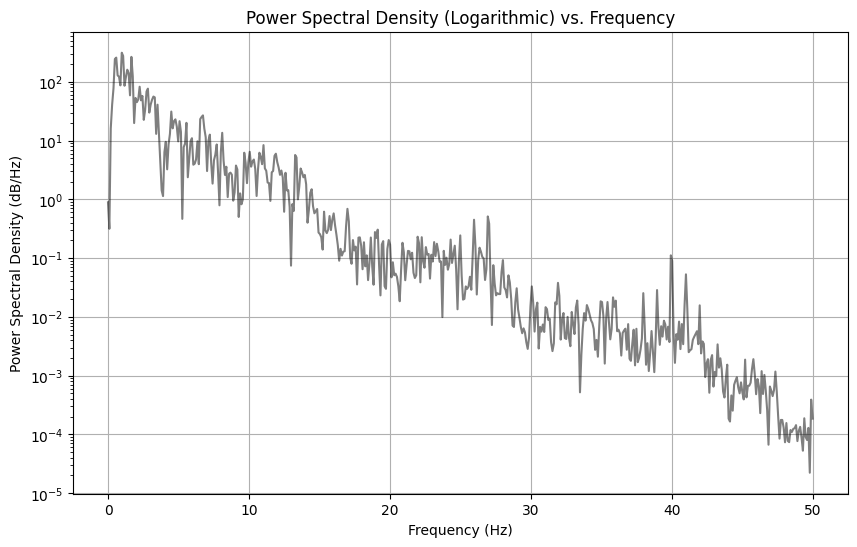

In [24]:
#Calculating Power Spectral Density and plotting it on a logarithmic scale graph

psds, freqs = mne.time_frequency.psd_array_welch(eeg_data, sfreq, fmin = 0, fmax = 50, n_fft = 1024)

plt.figure(figsize=(10, 6))
plt.semilogy(freqs, psds.T, color='k', alpha=0.5)  # Plot the PSD on a logarithmic scale
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density (Logarithmic) vs. Frequency')
plt.grid(True)  # Add gridlines
plt.show()

In [23]:
#Finding absolute bandpowers

bandpowers = {}
for band, (low, high) in bands.items():
    freq_mask = np.logical_and(freqs >= low, freqs <= high)
    band_power = np.mean(psds[:, freq_mask], axis=1)
    bandpowers[band] = band_power

print(bandpowers)

{'Delta': array([69.72536384]), 'Theta': array([10.79509139]), 'Alpha': array([3.29477983]), 'Beta': array([0.31040482])}


In [26]:
#Calculation of relative bandpowers and the band with highest bandpower

total_power = np.sum(psds, axis=1)
relative_bandpowers = {band: bandpowers[band] / total_power for band in bands}

max_band = max(relative_bandpowers, key=lambda x: np.mean(relative_bandpowers[x]))

print("Frequency band with the highest relative bandpower:", max_band)

Frequency band with the highest relative bandpower: Delta
